In [14]:
import pandas as pd
from fancyimpute import KNN   
from sklearn import preprocessing
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.preprocessing import PolynomialFeatures

In [2]:
train = pd.read_csv("../data/X_train.csv")
test = pd.read_csv("../data/X_test.csv")
y = pd.read_csv("../data/y_train.csv").y

In [3]:
train = train.drop(columns=['id','x169','x283','x367','x777'])
test = test.drop(columns=['id','x169','x283','x367','x777'])

In [4]:
df = pd.concat([train,test])

### Linear models

In [5]:
knnOutput = KNN(k=3).fit_transform(df)

c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Imputing row 1/1988 with 58 missing, elapsed time: 25.842
Imputing row 101/1988 with 58 missing, elapsed time: 25.926
Imputing row 201/1988 with 56 missing, elapsed time: 26.007
Imputing row 301/1988 with 74 missing, elapsed time: 26.099
Imputing row 401/1988 with 73 missing, elapsed time: 26.184
Imputing row 501/1988 with 51 missing, elapsed time: 26.268
Imputing row 601/1988 with 67 missing, elapsed time: 26.360
Imputing row 701/1988 with 79 missing, elapsed time: 26.443
Imputing row 801/1988 with 74 missing, elapsed time: 26.528
Imputing row 901/1988 with 57 missing, elapsed time: 26.617
Imputing row 1001/1988 with 61 missing, elapsed time: 26.705
Imputing row 1101/1988 with 58 missing, elapsed time: 26.798
Imputing row 1201/1988 with 61 missing, elapsed time: 26.892
Imputing row 1301/1988 with 53 missing, elapsed time: 26.966
Imputing row 1401/1988 with 48 missing, elapsed time: 27.032
Imputing row 1501/1988 with 53 missing, elapsed time: 27.108
Imputing row 1601/1988 with 64 missi

In [9]:
X = pd.DataFrame(knnOutput, columns = df.columns)
X.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,100083.476176,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,10.081664,107841.227180,2.472763
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,2.205969
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,10.313230,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,106075.960094,1.930136


## Linear Models

In [6]:
scaler = preprocessing.StandardScaler().fit(X)
x_scale = scaler.transform(X)
X_sc = pd.DataFrame(x_scale)
X_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,818,819,820,821,822,823,824,825,826,827
0,1.961464,-0.680265,-1.754225,0.894249,1.373118,-0.407906,1.763947,0.159192,-1.124495,0.308873,...,0.803815,-1.129968,0.214829,0.331462,0.869444,0.739583,-0.961916,0.831564,0.878198,0.197921
1,0.040000,2.435440,-0.159286,1.198309,2.136597,-0.238713,-1.765623,-1.372630,1.392227,0.505643,...,1.125224,-1.696768,-0.129810,-0.007895,0.081726,0.481329,2.704633,0.047744,0.980944,1.283666
2,-0.499755,2.887837,-0.626964,0.365639,1.591698,1.348469,1.560379,-1.560496,-0.163564,0.465994,...,-0.668045,-0.158504,-0.054856,-1.056273,0.727724,-0.835924,0.680331,0.240619,-0.572327,-0.385316
3,0.538763,-0.484318,2.057947,1.172367,2.092365,-0.105893,0.402018,-0.996348,1.661127,1.287340,...,0.235326,1.565329,1.187077,-1.379608,-1.572142,1.390772,-0.201769,-0.711115,0.237624,1.359809
4,-0.115770,0.520656,-0.230284,0.515288,0.410684,0.175241,-0.888620,1.293390,-0.596886,0.242622,...,-0.519398,-0.876551,-1.397192,0.431738,0.122483,-1.195124,-1.093140,2.183042,-0.009722,-2.110839


In [8]:
tr_set = X_sc.iloc[:len(train),:]
ts_set = X_sc.iloc[len(train):,:]

NameError: name 'X_sc' is not defined

### Lasso regularization

In [8]:
reg = LassoCV(cv=5, random_state=0, max_iter= 50000).fit(tr_set, y)

In [9]:
coefs = [i for i in range(len(reg.coef_)) if abs(reg.coef_[i]) > 0]
len(coefs)

79

In [11]:
# tr_score = reg.score(tr_set, y) 
# cv_scores = cross_val_score(reg, tr_set, y, cv=5)
# print("Training set score: {:0.5f} ".format(tr_score))
# print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

### Linear Regression with Lasso coefs

In [53]:
lr = LinearRegression().fit(tr_set[coefs], y)
tr_score = lr.score(tr_set[coefs], y)
cv_scores = cross_val_score(lr, tr_set[coefs], y, cv=5)
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

Training set score: 0.52557 
Test-CV set score: 0.42810 


### Ridge Regression

In [57]:
rr = RidgeCV(cv=5).fit(tr_set, y)

In [58]:
tr_score = rr.score(tr_set, y)
cv_scores = cross_val_score(rr, tr_set, y, cv=5)
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Training set score: 0.79365 
Test-CV set score: -1.15601 


### Ridge Regression with Lasso coefs

In [59]:
rr_pn = RidgeCV(cv=5).fit(tr_set[coefs], y)
tr_score = rr_pn.score(tr_set[coefs], y)
cv_scores = cross_val_score(rr_pn, tr_set[coefs], y, cv=5)
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

Training set score: 0.52554 
Test-CV set score: 0.43019 


### Elastic-net

In [60]:
enet = ElasticNetCV(cv=5, random_state=0, max_iter = 50000)
enet.fit(tr_set, y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=50000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)

In [64]:
tr_score = enet.score(tr_set, y)
#cv_scores = cross_val_score(enet, tr_set, y, cv=5)
print("Training set score: {:0.5f} ".format(tr_score))
#print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

Training set score: 0.47594 


### Elastic-net with Lasso coefs

In [65]:
enet.fit(tr_set[coefs], y)
tr_score = enet.score(tr_set[coefs], y)
cv_scores = cross_val_score(enet, tr_set[coefs], y, cv=5)
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

Training set score: 0.52217 
Test-CV set score: 0.43494 


## Non-linear Models

In [10]:
tr = X.iloc[:len(train),:]
ts = X.iloc[len(train):,:]

In [11]:
model = RandomForestRegressor(n_estimators=100)
model.fit(tr, y)
top_1 = [x[1] for x in sorted(zip(model.feature_importances_, tr.columns),reverse=True)]
top_1[1:10]

['x529', 'x346', 'x757', 'x737', 'x617', 'x593', 'x809', 'x744', 'x130']

### Random Forest

In [12]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(tr, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [15]:
tr_score = rf.score(tr, y)
cv_scores = cross_val_score(rf, tr, y, cv=10, scoring="r2")
print("Training set score: {:0.5f} ".format(tr_score))
print("Test 10-fold-CV score: {:0.5f} ".format(cv_scores.mean()))

Training set score: 0.92835 
Test 10-fold-CV score: 0.48184 


### Random Forest with best top features

In [18]:
cv_vals = list()
for i in range(10,200,10):
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(tr[top_1[:i]], y)
    cv_scores = cross_val_score(rf, tr[top_1[:i]], y, cv=10, scoring="r2")
    cv_vals.append(cv_scores.mean())
    print("Top {} features".format(i))

Top 10 features
Top 20 features
Top 30 features
Top 40 features
Top 50 features
Top 60 features
Top 70 features
Top 80 features
Top 90 features
Top 100 features
Top 110 features
Top 120 features
Top 130 features
Top 140 features
Top 150 features
Top 160 features
Top 170 features
Top 180 features
Top 190 features


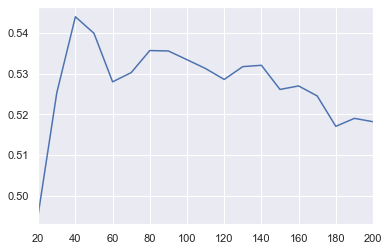

In [20]:
pd.Series(cv_vals, index=[10+i*10 for i in range(1,len(cv_vals)+1)]).plot()

In [21]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(tr[top_1[:40]], y)
tr_score = rf.score(tr[top_1[:40]], y)
cv_scores = cross_val_score(rf, tr[top_1[:40]], y, cv=10, scoring="r2")
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

Training set score: 0.93783 
Test-CV set score: 0.54070 


### Interactions

In [158]:
poly = PolynomialFeatures(2)
poly_all = pd.DataFrame(poly.fit_transform(X[top_1[:50]]))
poly_df = poly_all.iloc[:len(train),:]
poly_ts = poly_all.iloc[len(train):,:]
poly_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325
0,1.0,2243.302901,564.003090,2.745800,7346.839297,266.863177,9291.193684,248.754308,1045.689682,19168.336582,...,7.819871e+07,20331.850600,17480.459029,19896.158392,5.286330,4.544961,5.173049,3.907564,4.447567,5.062195
1,1.0,2608.930250,163.163481,2.928650,9430.575216,175.179986,18423.700135,133.422869,1269.789300,6454.866169,...,9.099345e+07,23587.808632,20122.637349,22254.500866,6.114558,5.216298,5.768931,4.449997,4.921445,5.442840
2,1.0,7759.176464,1836.514563,2.633866,7913.283619,942.853867,39176.219061,805.482669,1971.570050,-30172.204065,...,8.432832e+07,20257.512604,17117.335480,19413.173845,4.866299,4.111959,4.663470,3.474552,3.940572,4.469095
3,1.0,1818.615834,459.178240,2.658636,8542.248694,283.879920,16213.024512,99.129244,1412.169105,4403.581908,...,6.937304e+07,20697.142600,19241.699108,21155.840678,6.174902,5.740677,6.311752,5.336987,5.867904,6.451636
4,1.0,7231.383826,3009.587437,2.437194,6496.708149,3327.509708,31267.618199,246.717392,3791.751924,-3575.232287,...,6.959021e+07,16101.341763,17902.504915,17746.700734,3.725426,4.142168,4.106119,4.605528,4.565447,4.525714


In [134]:
model = RandomForestRegressor(n_estimators=200, max_depth=50, max_features=round(len(poly_df.columns)/3), min_samples_split=2)
model.fit(poly_df, y)
top = [x[1] for x in sorted(zip(model.feature_importances_, poly_df.columns),reverse=True)]
top

[36,
 39,
 196,
 74,
 35,
 158,
 40,
 143,
 103,
 117,
 167,
 148,
 58,
 153,
 45,
 41,
 42,
 147,
 73,
 355,
 390,
 72,
 501,
 166,
 109,
 395,
 1,
 325,
 225,
 171,
 144,
 159,
 151,
 411,
 149,
 309,
 157,
 146,
 156,
 228,
 78,
 184,
 125,
 564,
 374,
 356,
 478,
 311,
 498,
 126,
 485,
 91,
 268,
 115,
 490,
 365,
 433,
 155,
 130,
 114,
 17,
 416,
 59,
 360,
 598,
 128,
 459,
 375,
 316,
 404,
 312,
 364,
 3,
 111,
 326,
 269,
 323,
 471,
 457,
 387,
 24,
 61,
 134,
 405,
 496,
 392,
 361,
 441,
 421,
 313,
 161,
 308,
 358,
 605,
 54,
 322,
 129,
 522,
 506,
 493,
 233,
 469,
 4,
 116,
 260,
 164,
 264,
 512,
 590,
 580,
 439,
 581,
 47,
 616,
 443,
 460,
 55,
 423,
 546,
 150,
 562,
 62,
 241,
 49,
 64,
 514,
 458,
 75,
 509,
 18,
 197,
 486,
 118,
 168,
 595,
 329,
 470,
 362,
 302,
 383,
 545,
 418,
 119,
 382,
 594,
 50,
 27,
 479,
 401,
 376,
 25,
 602,
 569,
 536,
 497,
 160,
 46,
 548,
 541,
 553,
 391,
 307,
 450,
 238,
 142,
 366,
 112,
 121,
 371,
 378,
 465,
 560,
 36

In [137]:
cv_vals = list()
for i in range(146,156,2):
    rf = RandomForestRegressor(n_estimators=200, max_depth=50, max_features=round(i/3), min_samples_split=2)
    rf.fit(poly_df[top[:i]], y)
    cv_scores = cross_val_score(rf, poly_df[top[:i]], y, cv=5, scoring="r2")
    cv_vals.append(cv_scores.mean())
    print("Top {} features".format(i))

Top 146 features
Top 148 features
Top 150 features
Top 152 features
Top 154 features


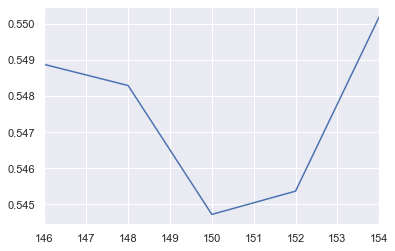

In [138]:
pd.Series(cv_vals, index=[144+i*2 for i in range(1,len(cv_vals)+1)]).plot()

In [139]:
rf = RandomForestRegressor(n_estimators=200, max_depth=50, max_features=round(154/3), min_samples_split=2)
rf.fit(poly_df[top[:154]], y)
tr_score = rf.score(poly_df[top[:154]], y)
cv_scores = cross_val_score(rf, poly_df[top[:154]], y, cv=5, scoring="r2")
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

Training set score: 0.93787 
Test-CV set score: 0.54655 


In [101]:
parameters = {  'max_depth': [40, 50, 60],
                'max_features': [round(146/3)],
                'min_samples_leaf': [1, 2],
                'min_samples_split': [2, 5],
                'n_estimators': [200, 300]
            }
grid = GridSearchCV(RandomForestRegressor(), parameters, cv=5, scoring='r2')
grid.fit(poly_df[top[:146]], y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [40, 50, 60], 'max

In [102]:
grid.best_params_

{'max_depth': 50,
 'max_features': 49,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [104]:
grid.best_score_ 

0.5567570191014624

In [150]:
rf = RandomForestRegressor(max_depth= 50, n_estimators=200, max_features=round(154/3), min_samples_split=5, min_samples_leaf = 2)
rf.fit(poly_df[top[:154]], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features=51, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [151]:
tr_score = rf.score(poly_df[top[:154]], y)
cv_scores = cross_val_score(rf, poly_df[top[:154]], y, cv=5, scoring="r2")
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

Training set score: 0.91631 
Test-CV set score: 0.54355 


In [153]:
rf = RandomForestRegressor(max_depth= 50, n_estimators=200, max_features=round(len(poly_df.columns)/3), min_samples_split=5, min_samples_leaf = 2)
rf.fit(poly_df, y)
tr_score = rf.score(poly_df, y)
cv_scores = cross_val_score(rf, poly_df, y, cv=5, scoring="r2")
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

Training set score: 0.92054 
Test-CV set score: 0.53829 


In [140]:
rf = RandomForestRegressor(n_estimators=200, max_depth=50, max_features=round(154/3), min_samples_split=2)
rf.fit(poly_df[top[:154]], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features=51, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Random Forest with Lasso coefs

In [79]:
rf = RandomForestRegressor(n_estimators=200, max_depth=50, max_features=round(len((tr.iloc[:,coefs]).columns)/3), min_samples_split=2)
rf.fit(tr.iloc[:,coefs], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features=26, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [81]:
tr_score = rf.score(tr.iloc[:,coefs], y)
cv_scores = cross_val_score(rf, tr.iloc[:,coefs], y, cv=5, scoring="r2")
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

Training set score: 0.93647 
Test-CV set score: 0.51338 


### XGBoost

In [13]:
xgb = XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 3)
xgb.fit(tr, y)

c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:05:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [14]:
tr_score = xgb.score(tr, y)
cv_scores = cross_val_score(xgb, tr, y, cv=5, scoring="r2")
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:06:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:06:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:06:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:06:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:06:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training set score: 0.87779 
Test-CV set score: 0.49028 


### XGBoost with interactions

In [161]:
xgb = XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 3)
xgb.fit(poly_df, y)

c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [160]:
tr_score = xgb.score(poly_df, y)
cv_scores = cross_val_score(xgb, poly_df, y, cv=5, scoring="r2")
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgb

Training set score: 0.87274 
Test-CV set score: 0.55007 


In [175]:
parameters = {  'learning_rate': [0.1,0.15], 
              'max_depth': [6]
            }

In [176]:
grid = GridSearchCV(XGBRegressor(), parameters, cv=5, scoring='r2')
grid.fit(poly_df, y)

[04:10:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:10:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:10:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:11:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:11:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:11:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:12:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:12:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:12:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:13:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[04:13:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.15], 'max_depth': [6]},
             pre_dispatch='2*n_jobs', refit=True

In [177]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6}

In [178]:
grid.best_score_

0.550922107875314

In [179]:
xgb = XGBRegressor(learning_rate= 0.1, max_depth= 6)
xgb.fit(poly_df, y)

[04:14:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### XGBoost with Lasso coefs

In [15]:
xgb.fit(tr.iloc[:,coefs], y)

c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:07:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [16]:
tr_score = xgb.score(tr.iloc[:,coefs], y)
cv_scores = cross_val_score(xgb,tr.iloc[:,coefs], y, cv=5, scoring="r2")
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:08:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:08:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:08:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:08:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:08:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training set score: 0.85435 
Test-CV set score: 0.52265 


In [34]:
tr_score = xgb.score(tr.iloc[:,coefs], y)
cv_scores = cross_val_score(xgb,tr.iloc[:,coefs], y, cv=5, scoring="r2")
print("Training set score: {:0.5f} ".format(tr_score))
print("Test-CV set score: {:0.5f} ".format(cv_scores.mean()))

c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:33:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:33:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:33:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:33:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\razerjon24\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:33:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training set score: 0.94157 
Test-CV set score: 0.53337 


### Multi-layer Perceptron Neural Network

In [ ]:
mlp = MLPRegressor()
mlp.fit(tr_set.iloc[:,coefs], y) #standardized

## Test

In [24]:
test_y = rf.predict(ts[top_1[:40]])
file_test = "rf_top_40"

In [143]:
test_y = rf.predict(poly_ts[top[:154]])
file_test = "rf_inter_top"

In [26]:
test_y = xgb.predict(ts.iloc[:,coefs])

In [180]:
test_y = xgb.predict(poly_ts)
file_test = "xgb_inter_top_grid"

In [25]:
output = pd.DataFrame({'id':[float(i) for i in range(0,len(test_y))],'y':test_y})
output.to_csv("{}.csv".format(file_test),index=False)

## Ensemble

In [183]:
out_1 = pd.read_csv("rf_inter_top.csv").y
out_2 = pd.read_csv("xgb_inter_top_grid.csv").y

### mean

In [184]:
ensemble = (out_1+out_2)/2
out_ensemble = pd.DataFrame({'id':[float(i) for i in range(0,len(ensemble))],'y':ensemble})
out_ensemble.to_csv("ensemble_mean.csv",index=False)

### linear regression

In [ ]:
lr_ensemble = LinearRegression().fit(tr_set[coefs], y)
